In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [3]:
data=pd.read_csv('/content/student-data.csv')
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime  goout

**This is a clear case of classification problem as the result is y/n ie.whether the student passes or not**

# **step 1:Exploring data**

In [4]:
data.shape

(395, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
# Calculate number of students
no_students =len(data.index)

# Calculate number of features
no_features = len(data.columns)

# Calculate passing students
no_passed = len(data[data['passed'] == 'yes'])

# Calculate failing students
no_failed = no_students - no_passed

# Calculate graduation rate
grad_rate = (no_passed / no_students) * 100
print("Total number of students: ",no_students)
print("Number of features:",no_features)
print("Number of students who passed:",no_passed)
print("Number of students who failed:",no_failed)
print("Graduation rate",grad_rate)

Total number of students:  395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate 67.08860759493672


# **Preparing data for modeling,testing and training**

**Inspecting feature columns and target columns**

In [8]:
print(data.columns)
d1=data.drop('passed',axis=1)
print('Feature columns:\n',d1)
d2=data['passed']
print('Target column:\n',d2)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')
Feature columns:
     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2   

Preprocessing feature columns:
Conversion of column values to numerical format
1.Replacing columns with non numerical data of the form yes/no with 1/o
2.One hot encoding for categorical columns 

In [9]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

Replacing y/n values with 1 and 0

In [10]:
for c in d1[['higher','internet','romantic']]:
    d1=d1.replace(['yes', 'no'], [1, 0])
print(d1.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0      1        0         0       4         3      4     1     1       3   
1      1        1         0       5         3      3     1     1       3   
2      1        1         0       4         3      2     2     3       3   
3      1        1         1       3         2      2     1     1       5   
4      1        0         0       4         3      2     1     2       5   

   absences  
0         6  
1         4  
2        10  


One hot encoding on categorical columns

In [11]:
d1=pd.get_dummies(d1,columns=['school','sex','address','reason','guardian','famsize','Pstatus', 'Mjob','Fjob'])
print(d1.head())
print(d1.dtypes)


   age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  paid  \
0   18     4     4           2          2         0          1       0     0   
1   17     1     1           1          2         0          0       1     0   
2   15     1     1           1          2         3          1       0     1   
3   15     4     2           1          3         0          0       1     1   
4   16     3     3           1          2         0          0       1     1   

   activities  ...  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
0           0  ...             1            0           0              0   
1           0  ...             1            0           0              0   
2           0  ...             1            0           0              0   
3           1  ...             0            1           0              0   
4           0  ...             0            0           1              0   

   Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_s

Splitting data set

In [12]:
x=d1 #features
y=d2 #target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
x_train.shape

(316, 48)

# **Implementation of KNN**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [15]:
acc_values

[0.6329113924050633,
 0.6075949367088608,
 0.6835443037974683,
 0.620253164556962,
 0.6582278481012658,
 0.6075949367088608,
 0.6582278481012658,
 0.6455696202531646,
 0.6455696202531646,
 0.6075949367088608,
 0.6708860759493671,
 0.6962025316455697]

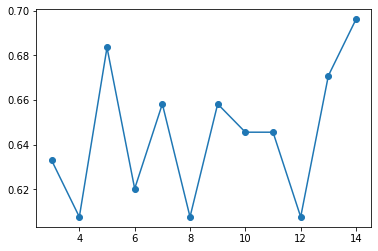

In [16]:
plt.plot(neighbors,acc_values,'o-')
plt.show()

KNN with k=14

In [17]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)


In [18]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,pos_label='yes'))
print('Recall is',recall_score(y_test,y_pred,pos_label='yes'))
print('F1 score is',f1_score(y_test,y_pred,pos_label='yes'))

Accuracy is 0.6962025316455697
Precision is 0.7
Recall is 0.9423076923076923
F1 score is 0.8032786885245902


In [19]:
confusion_matrix(y_test,y_pred)

array([[ 6, 21],
       [ 3, 49]])

There are 27 misclassifications

standard scaling

In [20]:
d1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,...,0.149367,0.086076,0.356962,0.260759,0.146835,0.050633,0.045570,0.549367,0.281013,0.073418
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,...,0.356902,0.280832,0.479711,0.439606,0.354391,0.219525,0.208814,0.498188,0.450064,0.261152
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

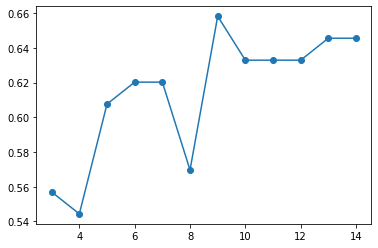

In [22]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
plt.plot(neighbors,acc_values,'o-')
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [24]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,pos_label='yes'))
print('Recall is',recall_score(y_test,y_pred,pos_label='yes'))
print('F1 score is',f1_score(y_test,y_pred,pos_label='yes'))

Accuracy is 0.6582278481012658
Precision is 0.6811594202898551
Recall is 0.9038461538461539
F1 score is 0.7768595041322315


In [25]:
confusion_matrix(y_test,y_pred)

array([[ 5, 22],
       [ 5, 47]])

Standard scaling is decreasing performance of KVM model.so scaling is not necessary

# **Implementation of DT**

In [51]:
x=d1 #features
y=d2 #target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_model=DecisionTreeClassifier()

In [54]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred=dt_model.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))


Accuracy is 0.6075949367088608


In [56]:
confusion_matrix(y_test,y_pred)

array([[10, 17],
       [14, 38]])

Misclassifications=31 

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [58]:
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6075949367088608


array([[10, 17],
       [14, 38]])

# **Implementation of SVM**

In [34]:
from sklearn.svm import SVC

In [35]:
svm_linear=SVC(kernel='linear')

In [36]:
x=d1 #features
y=d2 #target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [37]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
y_pred=svm_linear.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.6962025316455697


In [39]:
confusion_matrix(y_test,y_pred)

array([[10, 17],
       [ 7, 45]])

Misclassifications=24

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6835443037974683


array([[11, 16],
       [ 9, 43]])

**Polynomial SVM**

In [41]:
svm_poly=SVC(kernel='poly',degree=3)

In [42]:
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [43]:
y_pred=svm_poly.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6455696202531646


array([[ 3, 24],
       [ 4, 48]])

**Radial SVM**

In [44]:
svm_radial=SVC(kernel='rbf')

In [45]:
svm_radial.fit(x_train,y_train)

SVC()

In [46]:
y_pred=svm_radial.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6455696202531646


array([[ 2, 25],
       [ 3, 49]])

# **Implementation of Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier


In [48]:
rf_model = RandomForestClassifier(random_state=42)

In [49]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred=rf_model.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6835443037974683


array([[ 5, 22],
       [ 3, 49]])

**Out of all the implemented algorithms,SVM is the best choice here ,since it gives an accuracy of approximately 70%.**